In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

## Loading data

In [3]:
df = pd.read_csv('train.csv')
pd.set_option('display.max_columns', None)
df.drop(columns=['id', 'Unnamed: 0'], inplace=True)
df.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,satisfied
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,satisfied


In [4]:
df.describe()

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103594.000000
mean,39.379706,1189.448375,2.729683,3.060296,2.756901,2.976883,3.202129,3.250375,3.439396,3.358158,3.382363,3.351055,3.631833,3.304290,3.640428,3.286351,14.815618,15.178678
std,15.114964,997.147281,1.327829,1.525075,1.398929,1.277621,1.329533,1.349509,1.319088,1.332991,1.288354,1.315605,1.180903,1.265396,1.175663,1.312273,38.230901,38.698682
min,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,40.000000,843.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,51.000000,1743.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


In [5]:
df.shape

(103904, 23)

In [6]:
df_test = pd.read_csv('test.csv')
pd.set_option('display.max_columns', None)
df_test.drop(columns=['id', 'Unnamed: 0'], inplace=True)
df_test.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Female,Loyal Customer,52,Business travel,Eco,160,5,4,3,4,3,4,3,5,5,5,5,2,5,5,50,44.0,satisfied
1,Female,Loyal Customer,36,Business travel,Business,2863,1,1,3,1,5,4,5,4,4,4,4,3,4,5,0,0.0,satisfied
2,Male,disloyal Customer,20,Business travel,Eco,192,2,0,2,4,2,2,2,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,Male,Loyal Customer,44,Business travel,Business,3377,0,0,0,2,3,4,4,1,1,1,1,3,1,4,0,6.0,satisfied
4,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,4,3,4,1,2,2,2,2,2,4,2,4,0,20.0,satisfied


## Data Cleaning

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Gender                             103904 non-null  object 
 1   Customer Type                      103904 non-null  object 
 2   Age                                103904 non-null  int64  
 3   Type of Travel                     103904 non-null  object 
 4   Class                              103904 non-null  object 
 5   Flight Distance                    103904 non-null  int64  
 6   Inflight wifi service              103904 non-null  int64  
 7   Departure/Arrival time convenient  103904 non-null  int64  
 8   Ease of Online booking             103904 non-null  int64  
 9   Gate location                      103904 non-null  int64  
 10  Food and drink                     103904 non-null  int64  
 11  Online boarding                    1039

In [8]:
df.isnull().sum()

Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction                           0
dtype: int64

In [9]:
df['Arrival Delay in Minutes']

0         18.0
1          6.0
2          0.0
3          9.0
4          0.0
          ... 
103899     0.0
103900     0.0
103901    14.0
103902     0.0
103903     0.0
Name: Arrival Delay in Minutes, Length: 103904, dtype: float64

In [10]:
df['Arrival Delay in Minutes'] = df['Arrival Delay in Minutes'].fillna(0)

In [11]:
df['Arrival Delay in Minutes']

0         18.0
1          6.0
2          0.0
3          9.0
4          0.0
          ... 
103899     0.0
103900     0.0
103901    14.0
103902     0.0
103903     0.0
Name: Arrival Delay in Minutes, Length: 103904, dtype: float64

In [12]:
df.isnull().sum()

Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
dtype: int64

In [13]:
df_test['Arrival Delay in Minutes'] = df_test['Arrival Delay in Minutes'].fillna(0)

## Charts

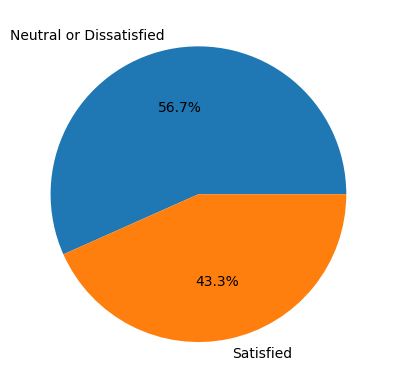

In [14]:
plt.pie(df['satisfaction'].value_counts(), labels=['Neutral or Dissatisfied', 'Satisfied'], autopct='%1.1f%%')
plt.show()

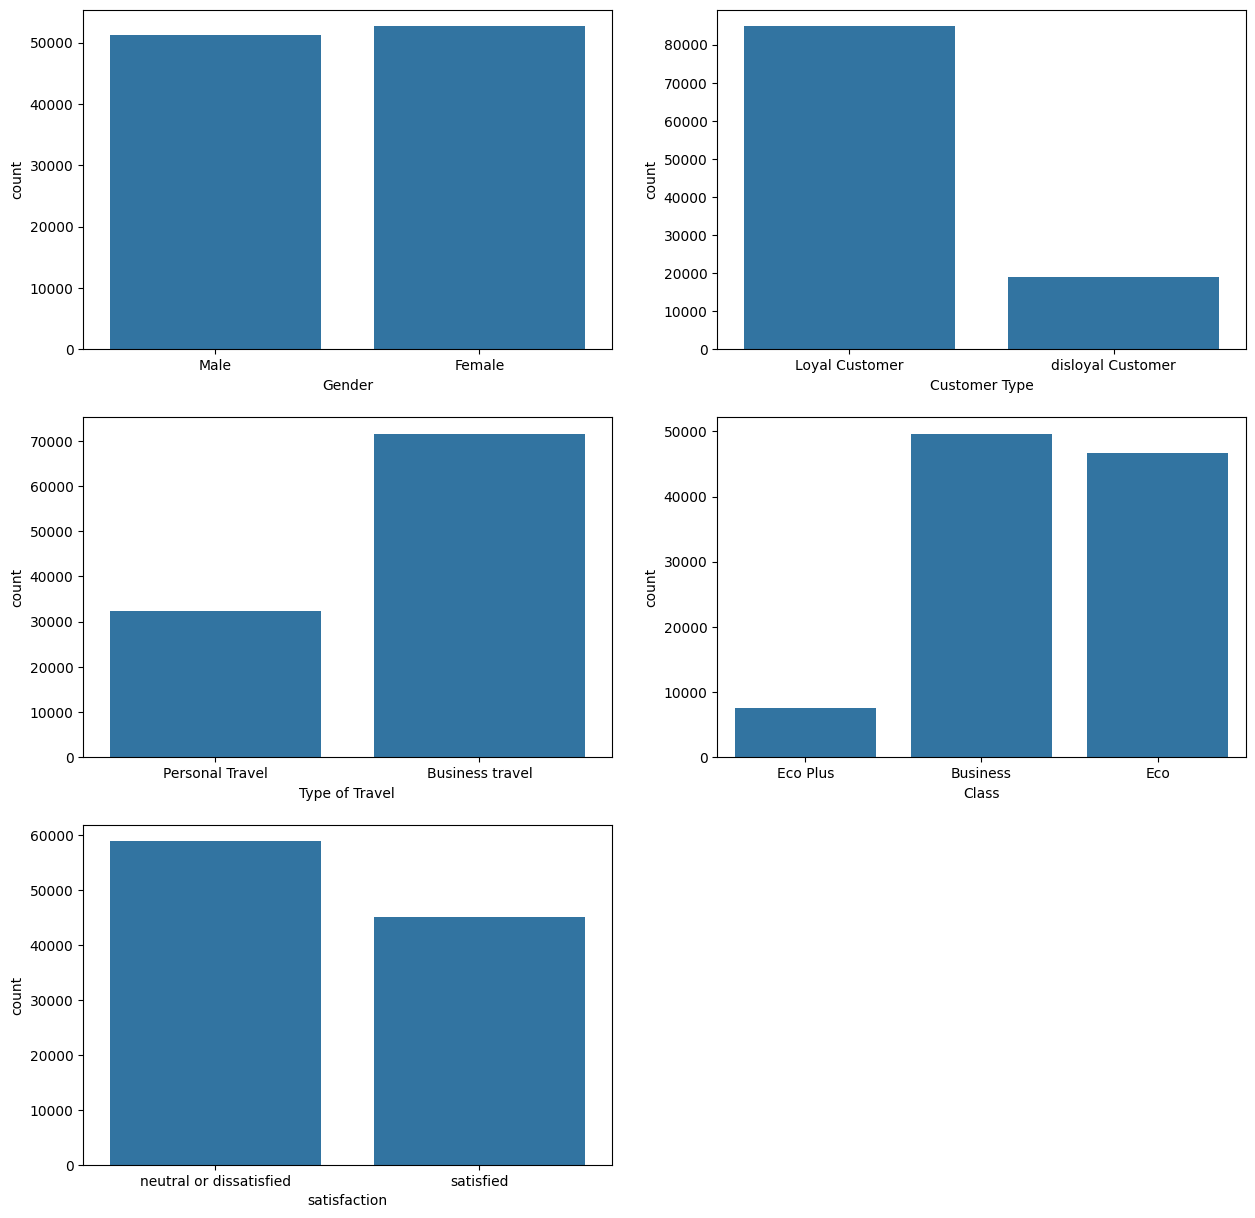

In [15]:
cols = ['Gender', 'Customer Type', 'Type of Travel', 'Class', 'satisfaction']
plt.figure(figsize=(15, 15))
for i, col in enumerate(cols):
    plt.subplot(3, 2, i + 1)
    sns.countplot(x=col, data=df)
plt.show()

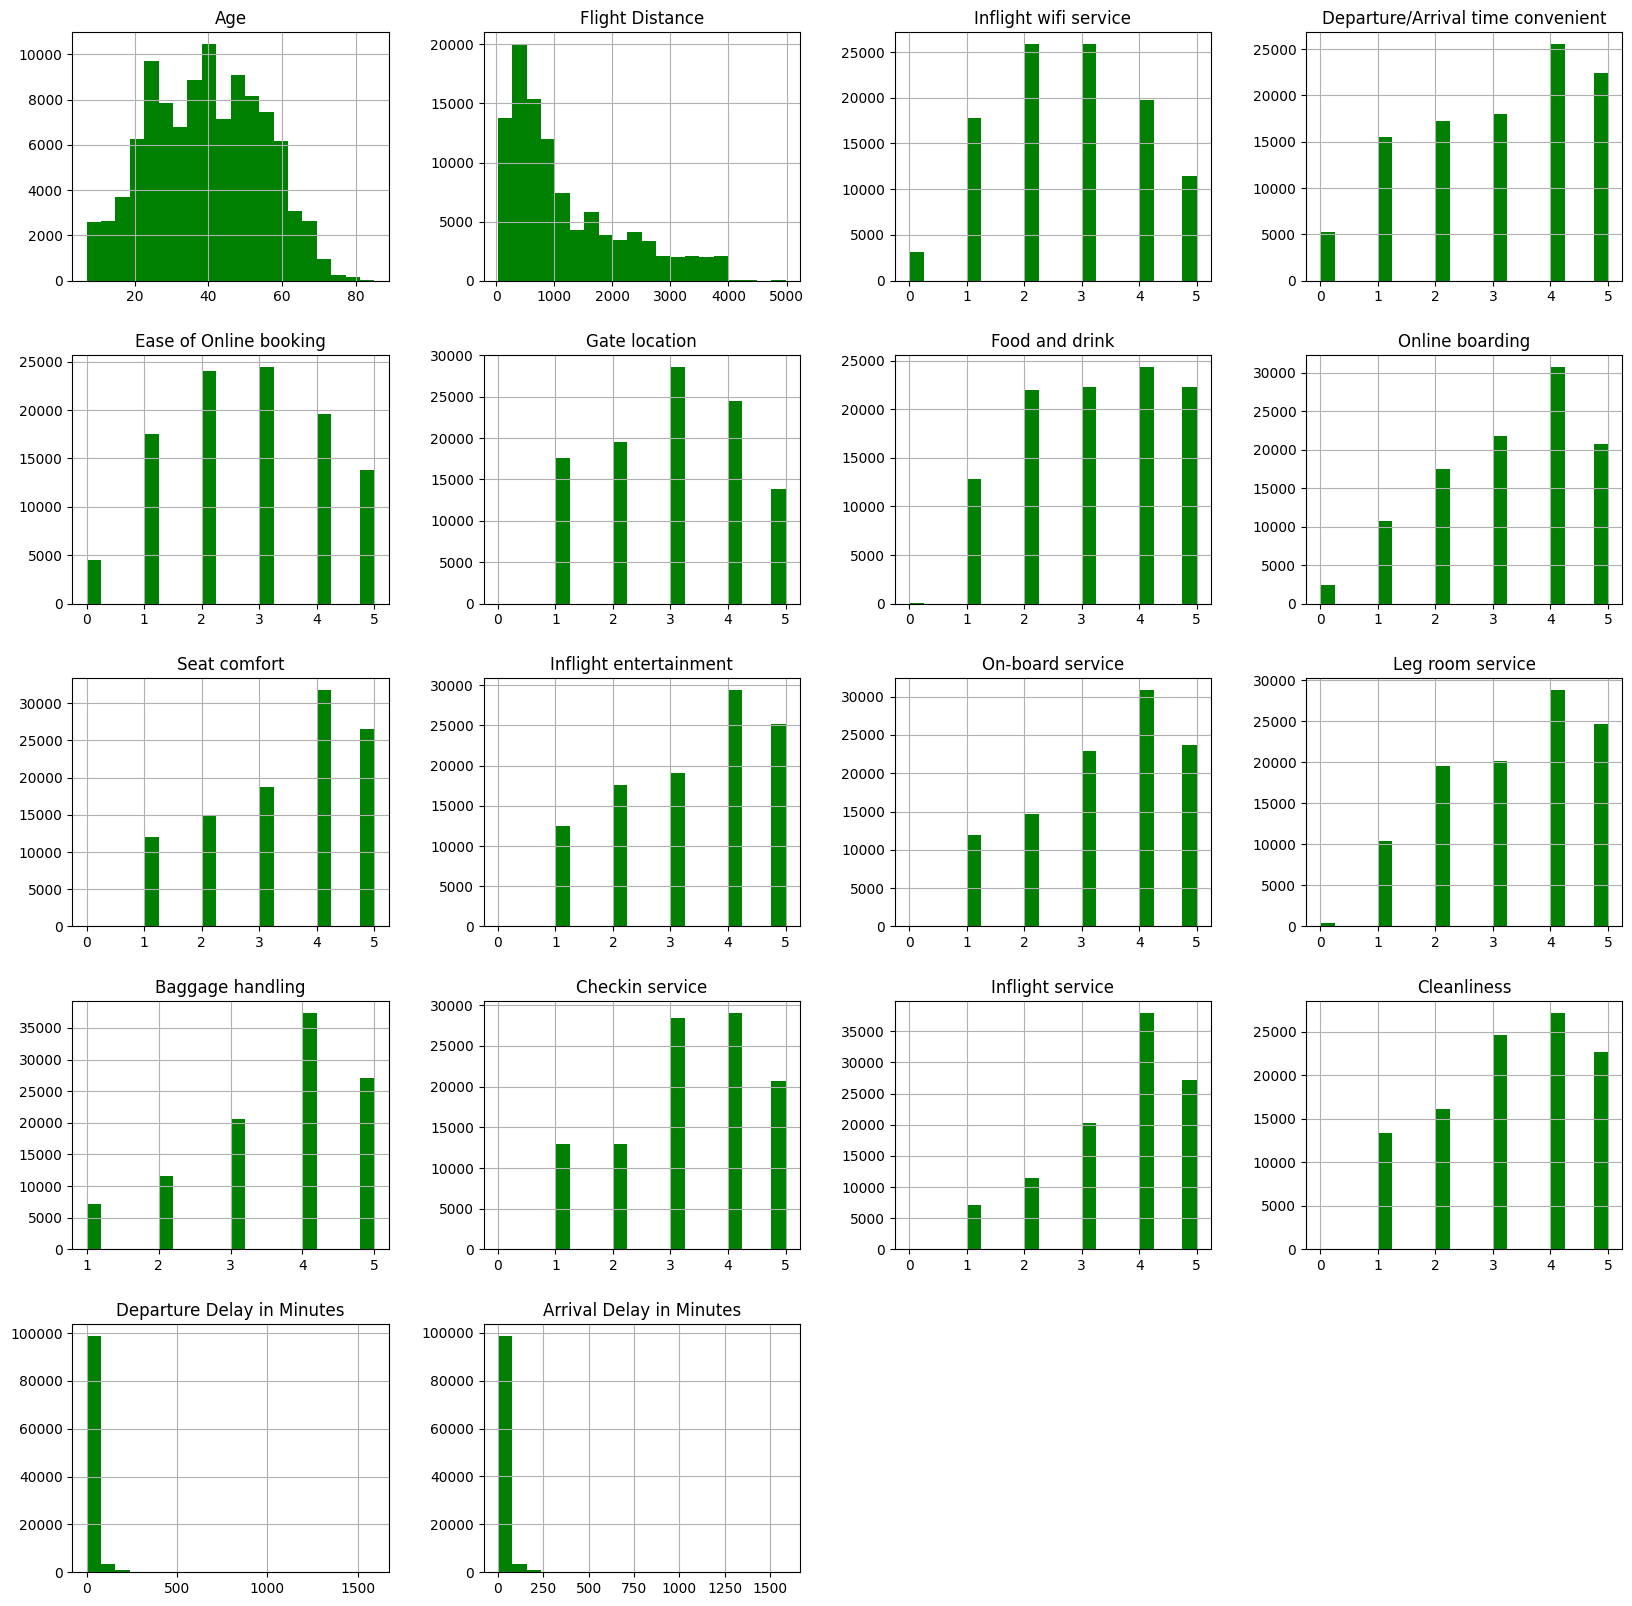

In [16]:
df.hist(bins=20, figsize=(20, 20), color='green')
plt.show()

## Column Data Encoding

In [17]:
df.select_dtypes(include='object').columns

Index(['Gender', 'Customer Type', 'Type of Travel', 'Class', 'satisfaction'], dtype='object')

In [18]:
df['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [19]:
df['Customer Type'].unique()

array(['Loyal Customer', 'disloyal Customer'], dtype=object)

In [20]:
df['Type of Travel'].unique()

array(['Personal Travel', 'Business travel'], dtype=object)

In [21]:
df['Class'].unique()

array(['Eco Plus', 'Business', 'Eco'], dtype=object)

In [22]:
df['satisfaction'].unique()

array(['neutral or dissatisfied', 'satisfied'], dtype=object)

In [23]:
label_encoder = LabelEncoder()
columns = df.select_dtypes(include='object').drop(columns='satisfaction').columns
for column in columns:
    df[column] = label_encoder.fit_transform(df[column])
df.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,1,0,13,1,2,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,1,25,0,0,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,0,0,26,0,0,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,satisfied
3,0,0,25,0,0,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,1,0,61,0,0,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,satisfied


In [24]:
df.dtypes

Gender                                 int64
Customer Type                          int64
Age                                    int64
Type of Travel                         int64
Class                                  int64
Flight Distance                        int64
Inflight wifi service                  int64
Departure/Arrival time convenient      int64
Ease of Online booking                 int64
Gate location                          int64
Food and drink                         int64
Online boarding                        int64
Seat comfort                           int64
Inflight entertainment                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Inflight service                       int64
Cleanliness                            int64
Departure Delay in Minutes             int64
Arrival Delay in Minutes             float64
satisfacti

In [25]:
label_encoder = LabelEncoder()
columns = df_test.select_dtypes(include='object').drop(columns='satisfaction').columns
for column in columns:
    df_test[column] = label_encoder.fit_transform(df_test[column])
df_test.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,0,52,0,1,160,5,4,3,4,3,4,3,5,5,5,5,2,5,5,50,44.0,satisfied
1,0,0,36,0,0,2863,1,1,3,1,5,4,5,4,4,4,4,3,4,5,0,0.0,satisfied
2,1,1,20,0,1,192,2,0,2,4,2,2,2,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,1,0,44,0,0,3377,0,0,0,2,3,4,4,1,1,1,1,3,1,4,0,6.0,satisfied
4,0,0,49,0,1,1182,2,3,4,3,4,1,2,2,2,2,2,4,2,4,0,20.0,satisfied


## Additional charts

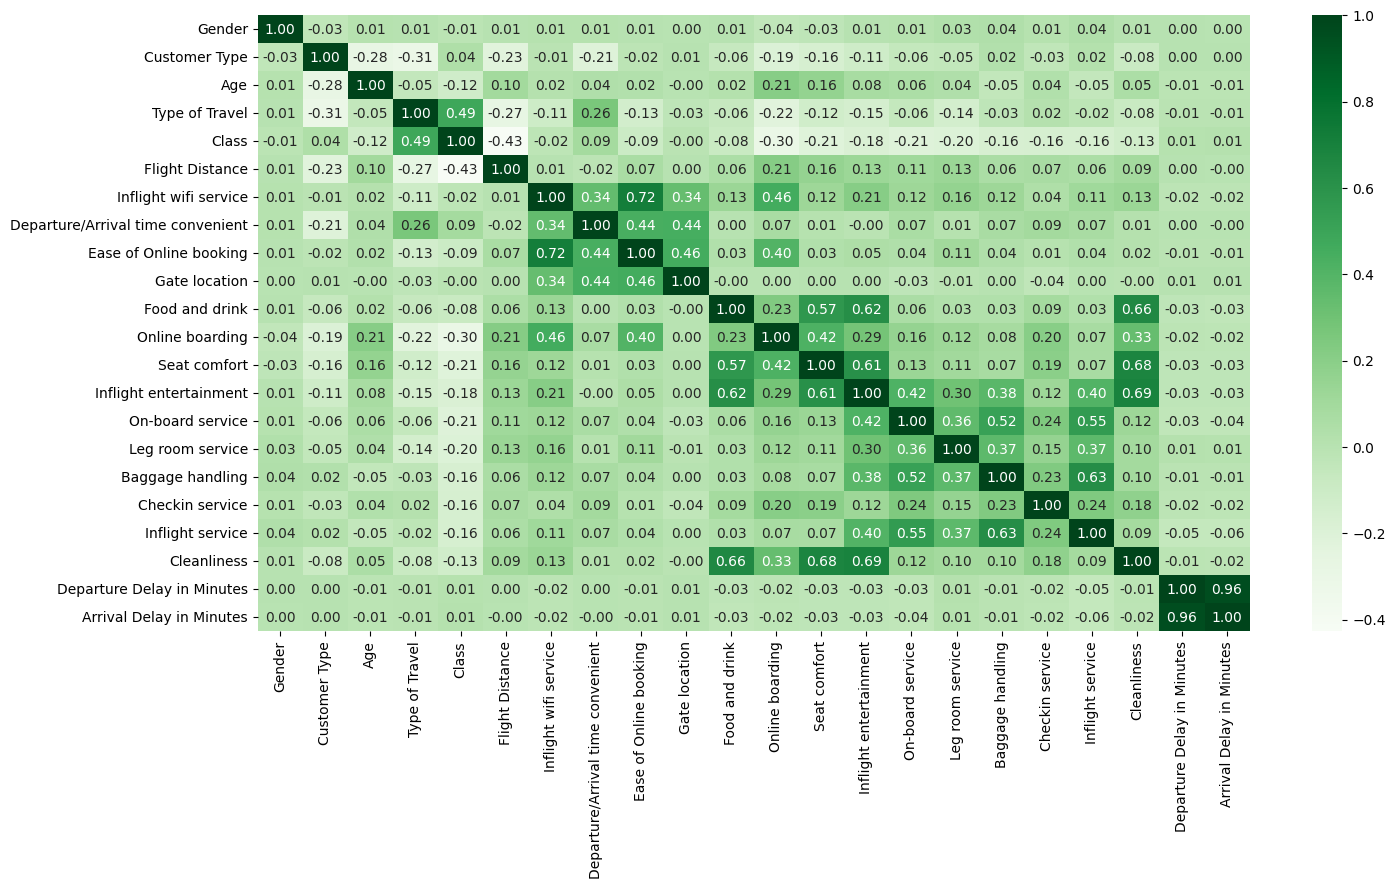

In [26]:
plt.figure(figsize=(16, 8))
sns.heatmap(df.drop(columns='satisfaction').corr(), annot=True, fmt='.2f', cmap='Greens')
plt.show()

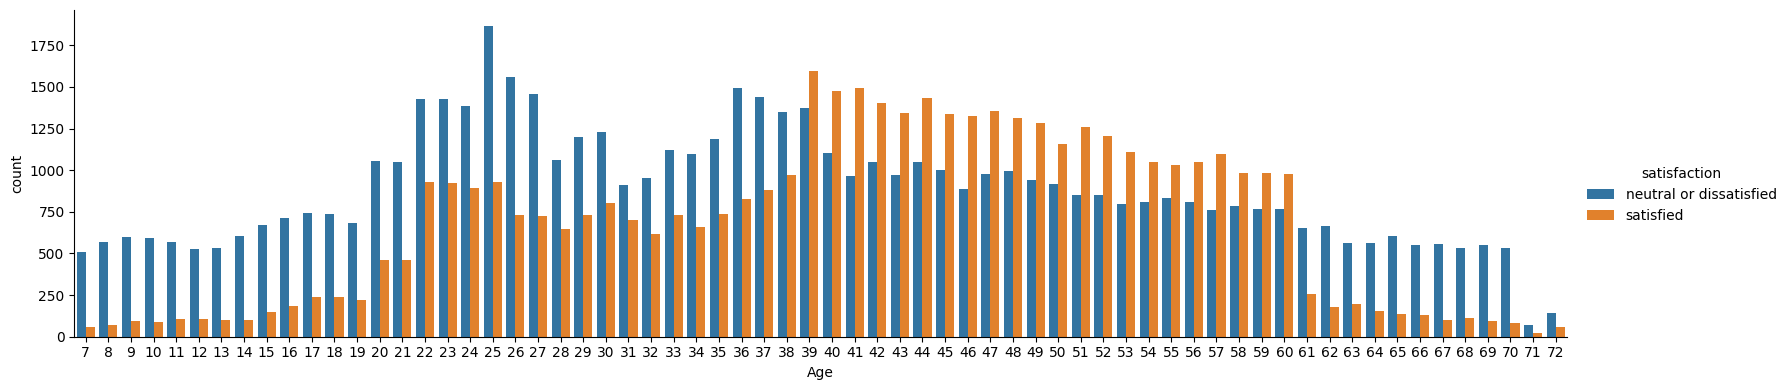

In [27]:
sns.catplot(data=df, x='Age', height=4, aspect=4, kind='count', hue='satisfaction', order=range(7, 73))
plt.show()

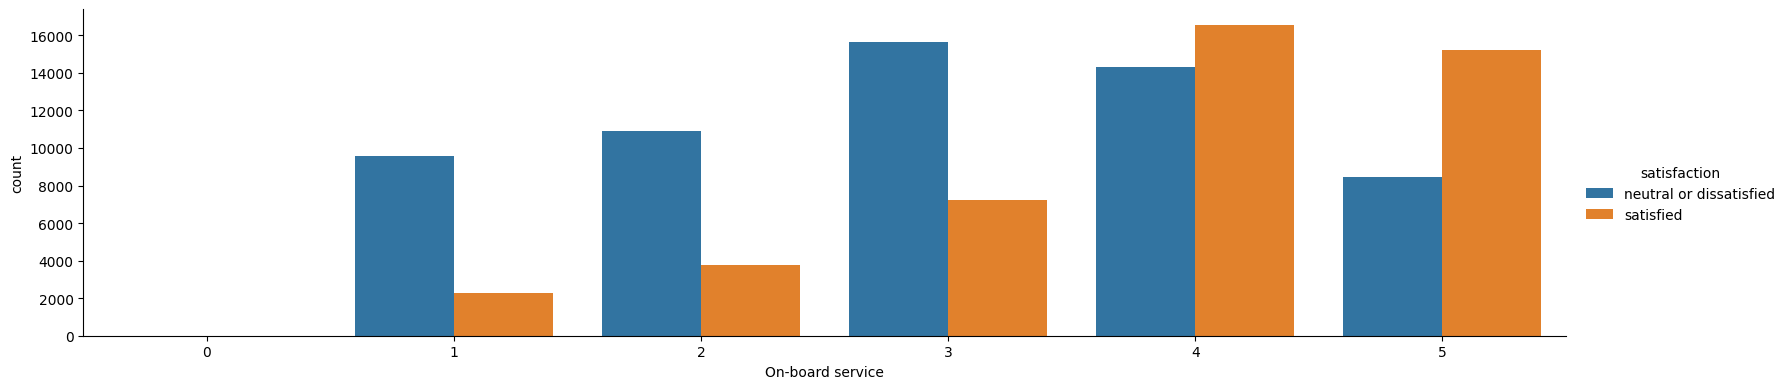

In [28]:
sns.catplot(data=df, x='On-board service', height=4, aspect=4, kind='count', hue='satisfaction')
plt.show()

## Filtering data

In [29]:
df[['Gender', 'Age', 'Type of Travel']].head()

,Gender,Age,Type of Travel
0,1,13,1
1,1,25,0
2,0,26,0
3,0,25,0
4,1,61,0


In [30]:
df.loc[2:5, ['Gender', 'Age', 'Flight Distance']]

,Gender,Age,Flight Distance
2,0,26,1142
3,0,25,562
4,1,61,214
5,0,26,1180


In [31]:
df.loc[df['Age'] > 50, ['Gender', 'Age', 'Flight Distance']].head()

,Gender,Age,Flight Distance
4,1,61,214
7,0,52,2035
12,1,53,834
23,0,58,2139
25,1,57,719


In [32]:
df.loc[df['Gender'] == 1, ['Gender', 'Age', 'Flight Distance']].head()

,Gender,Age,Flight Distance
0,1,13,460
1,1,25,235
4,1,61,214
6,1,47,1276
9,1,20,1061


In [33]:
df.iloc[10:15, 1:7]

,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service
10,1,24,0,1,1182,4
11,0,12,1,2,308,2
12,0,53,0,1,834,1
13,0,33,1,1,946,4
14,0,26,1,1,453,3


In [34]:
df.columns

Index(['Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

In [35]:
df.index

RangeIndex(start=0, stop=103904, step=1)

## Models

In [36]:
X_train = df.drop(columns='satisfaction')
y_train = df['satisfaction']
X_test = df_test.drop(columns='satisfaction')
y_test = df_test['satisfaction']

### Decision Tree

In [37]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

model = DecisionTreeClassifier()

model.fit(X_train, y_train)

DecisionTreeClassifier()

In [38]:
predictions = model.predict(X_test)
predictions

array(['satisfied', 'satisfied', 'neutral or dissatisfied', ...,
       'neutral or dissatisfied', 'satisfied', 'neutral or dissatisfied'],
      shape=(25976,), dtype=object)

In [39]:
accuracy_score(y_test, predictions)

0.9469125346473668

### Random Forest

In [40]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

model = RandomForestClassifier()

model.fit(X_train, y_train)

RandomForestClassifier()

In [41]:
predictions = model.predict(X_test)
predictions

array(['satisfied', 'satisfied', 'neutral or dissatisfied', ...,
       'neutral or dissatisfied', 'satisfied', 'neutral or dissatisfied'],
      shape=(25976,), dtype=object)

In [42]:
accuracy_score(y_test, predictions)

0.9635817677856483

### KNeighborsClassifier

In [43]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

model = KNeighborsClassifier()

model.fit(X_train, y_train)

KNeighborsClassifier()

In [44]:
predictions = model.predict(X_test)
predictions

array(['neutral or dissatisfied', 'satisfied', 'neutral or dissatisfied',
       ..., 'neutral or dissatisfied', 'satisfied',
       'neutral or dissatisfied'], shape=(25976,), dtype=object)

In [45]:
accuracy_score(y_test, predictions)

0.746458269171543

### Logistic Regression

In [46]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

model = LogisticRegression(max_iter=10000)

model.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

In [47]:
predictions = model.predict(X_test)
predictions

array(['satisfied', 'satisfied', 'neutral or dissatisfied', ...,
       'neutral or dissatisfied', 'satisfied', 'neutral or dissatisfied'],
      shape=(25976,), dtype=object)

In [48]:
accuracy_score(y_test, predictions)

0.8709963042808746

## Prediction without Voting columns

In [49]:
X_train = df[['Gender', 'Age', 'Customer Type', 'Type of Travel', 'Class', 'Flight Distance', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']]
X_test = df_test[['Gender', 'Age', 'Customer Type', 'Type of Travel', 'Class', 'Flight Distance', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']]

In [54]:
y_train = df['satisfaction']
y_test = df_test['satisfaction']

In [55]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

model = RandomForestClassifier()

model.fit(X_train, y_train)

RandomForestClassifier()

In [56]:
predictions = model.predict(X_test)

In [57]:
accuracy_score(y_test, predictions)

0.7630890052356021

In [62]:
test_inputs = {'Gender': [1, 0],
 'Age': [35, 25],
 'Customer Type': [0, 1],
 'Type of Travel': [0, 0],
 'Class': [1, 1],
 'Flight Distance': [1200, 600],
 'Departure Delay in Minutes': [0, 5],
 'Arrival Delay in Minutes': [0, 5]}

test_df = pd.DataFrame(test_inputs)
test_df

,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes
0,1,35,0,0,1,1200,0,0
1,0,25,1,0,1,600,5,5


In [63]:
model.predict(test_df)

array(['satisfied', 'neutral or dissatisfied'], dtype=object)

## Saving Prediction Model

In [64]:
import joblib
joblib.dump(model, 'airline_passenger_satisfaction.joblib')

['airline_passenger_satisfaction.joblib']

In [65]:
test_inputs = {'Gender': [1, 0],
 'Age': [35, 25],
 'Customer Type': [0, 1],
 'Type of Travel': [0, 0],
 'Class': [1, 1],
 'Flight Distance': [1200, 600],
 'Departure Delay in Minutes': [0, 5],
 'Arrival Delay in Minutes': [0, 5]}

test_df = pd.DataFrame(test_inputs)
test_df

,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes
0,1,35,0,0,1,1200,0,0
1,0,25,1,0,1,600,5,5


In [66]:
trained_model = joblib.load('airline_passenger_satisfaction.joblib')
trained_model.predict(test_df)

array(['satisfied', 'neutral or dissatisfied'], dtype=object)